# Modelo de Regresión Lineal Múltiple

El gerente de la empresa inmobiliaria CasaRoble busca predecir el precio de venta de viviendas usando variables como el año de construcción, tamaño, número de parqueaderos, entre otras. Para ello, dispone de información recolectada durante los últimos diez años sobre precios de venta de apartamentos y variables explicativas.

## Evaluación del Modelo

El análisis del modelo de regresión lineal múltiple se centrará en los siguientes puntos clave:

- **Selección de variables independientes.**
- **Estructura del modelo y estimación de parámetros.**
- **Verificación de los supuestos del modelo de regresión.**
- **Bondad de ajuste.**
- **Cálculo de intervalos de confianza y pruebas de hipótesis.**
- **Interpretación de los coeficientes.**

El criterio principal para evaluar el modelo será el **MSE (Mean Squared Error)** o Error Cuadrático Medio.


# Primera Entrega: Análisis Test Real State

1. Limpieza de Datos:
En esta sección, se limpiarán los datos, eliminando valores nulos, duplicados y corrigiendo errores en el dataset.
2. Medidas de Tendencia Central:
Se calcularán las medidas de tendencia central (media, mediana, moda) para las variables relevantes, con el objetivo de entender la distribución de los datos.
3. Interpretación de Medidas de Dispersión:
Se interpretarán las medidas de dispersión, como el rango, la desviación estándar y la varianza, para comprender la variabilidad de los datos.
4. Interpretación de Diagramas de Caja:
Se analizarán los diagramas de caja para identificar posibles valores atípicos y la distribución general de las variables.
5. Construir e Interpretar Tablas de Contingencias:
Se construirán tablas de contingencia para analizar la relación entre variables categóricas.
6. Diagramas de Dispersión y Cálculo:
Se realizarán diagramas de dispersión para estudiar la relación entre variables continuas, identificando posibles patrones lineales o no lineales.
7. Interpretación del Coeficiente de Correlación:
Se calculará e interpretará el coeficiente de correlación entre las variables para medir la fuerza y dirección de las relaciones lineales.
8. Diagrama de Correlación:
Se presentará un mapa de calor (heatmap) de correlaciones entre las variables del dataset, facilitando la identificación de relaciones fuertes o débiles.



In [3]:
# Importar las librerías necesarias para el análisis exploratorio

# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticas y análisis
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Configuración adicional para visualización
# Establecer un estilo más agradable para los gráficos
sns.set(style="whitegrid")

# Evitar que los gráficos se muestren cortados 
%matplotlib inline


In [4]:
# Cargar el conjunto de datos
df = pd.read_csv("Train_real_state.csv")

#Visualizar las primeras filas del dataset para conocer su estructura.
df.head(3)


,Unnamed: 0,SalePrice,YearBuilt,YrSold,MonthSold,Size.sqf.,Floor,HallwayType,HeatingType,AptManageType,...,N_FacilitiesNearBy.Mall.,N_FacilitiesNearBy.ETC.,N_FacilitiesNearBy.Park.,N_SchoolNearBy.Elementary.,N_SchoolNearBy.Middle.,N_SchoolNearBy.High.,N_SchoolNearBy.University.,N_FacilitiesInApt,N_FacilitiesNearBy.Total.,N_SchoolNearBy.Total.
0,1,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,...,1,1,0,3,2,2,2,5,6,9
1,2,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,...,1,2,1,2,1,1,0,3,12,4
2,3,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,...,1,2,1,2,1,1,0,3,12,4


In [5]:
# Revisar el tamaño del dataset
filas, columnas = df.shape
print(f"El tamaño del dataset es: {filas} filas y {columnas} columnas")


El tamaño del dataset es: 4124 filas y 31 columnas


In [6]:
df = df.drop(df.columns[0], axis=1)
print(df.shape)

(4124, 30)


In [7]:
#Verifica los tipos de datos, valores nulos y otras características básicas con .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4124 entries, 0 to 4123
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   SalePrice                           4124 non-null   int64 
 1   YearBuilt                           4124 non-null   int64 
 2   YrSold                              4124 non-null   int64 
 3   MonthSold                           4124 non-null   int64 
 4   Size.sqf.                           4124 non-null   int64 
 5   Floor                               4124 non-null   int64 
 6   HallwayType                         4124 non-null   object
 7   HeatingType                         4124 non-null   object
 8   AptManageType                       4124 non-null   object
 9   N_Parkinglot.Ground.                4124 non-null   int64 
 10  N_Parkinglot.Basement.              4124 non-null   int64 
 11  TimeToBusStop                       4124 non-null   obje

In [8]:
#Verificar si en el dataset hay registros nulos
faltantes = 0
for i in range(1, 5):
    faltantes = round(100 * len(df[df.isnull().sum(axis=1) >= i]) / len(df), 2)
    
print(f"De la muestra original, el número de registros con valores nulos es {faltantes}%")


De la muestra original, el número de registros con valores nulos es 0.0%


- **Observación** :
De las 30 variables se identifica que existen 6 variables de tipo categóricas y 24 variables de tipo numéricas y que la base de datos no contiene registros nulos.

In [10]:
# Identificar duplicados en todas las columnas de 'df'
duplicados = df[df.duplicated(keep=False)]
num_duplicados = len(duplicados)

if num_duplicados > 0:
    print(f"Número total de filas duplicadas: {num_duplicados}")
    # Eliminar duplicados manteniendo solo la primera aparición
    df_sin_duplicados = df.drop_duplicates()
    print("Duplicados eliminados.")
else:
    print("No hay filas duplicadas en el DataFrame.")

#df_sin_duplicados.shape()
print(df_sin_duplicados.shape)
duplicados.head()


Número total de filas duplicadas: 300
Duplicados eliminados.
(3932, 30)


,SalePrice,YearBuilt,YrSold,MonthSold,Size.sqf.,Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot.Ground.,...,N_FacilitiesNearBy.Mall.,N_FacilitiesNearBy.ETC.,N_FacilitiesNearBy.Park.,N_SchoolNearBy.Elementary.,N_SchoolNearBy.Middle.,N_SchoolNearBy.High.,N_SchoolNearBy.University.,N_FacilitiesInApt,N_FacilitiesNearBy.Total.,N_SchoolNearBy.Total.
115,176106,2006,2008,2,903,1,terraced,individual_heating,management_in_trust,123,...,1,2,0,4,3,3,1,4,8,11
116,176106,2006,2008,2,903,1,terraced,individual_heating,management_in_trust,123,...,1,2,0,4,3,3,1,4,8,11
191,291238,2007,2008,5,1394,11,terraced,individual_heating,management_in_trust,554,...,2,0,1,2,2,2,2,4,9,8
192,291238,2007,2008,5,1394,11,terraced,individual_heating,management_in_trust,554,...,2,0,1,2,2,2,2,4,9,8
299,286902,2007,2008,10,1394,9,terraced,individual_heating,management_in_trust,554,...,2,0,1,2,2,2,2,4,9,8


- **Observación** :
Se ha implementado un proceso para identificar filas duplicadas en el conjunto de datos. Si se encuentran duplicados, estos se eliminan manteniendo solo la primera aparición. El objetivo de este paso es evitar que la presencia de datos repetidos pueda afectar el análisis posterior.

#### Selección de variables
  
En esta sección del análisis, se agrupan las variables disponibles según categorías clave como educación, transporte, parqueaderos y características del inmueble. Este agrupamiento tiene como objetivo optimizar el tiempo y la eficiencia del análisis estadístico. 

In [13]:
#Dataframe con variables seleccionadas
df_filtrado = df_sin_duplicados.drop(["N_SchoolNearBy.Elementary.","N_SchoolNearBy.Middle.","N_SchoolNearBy.High.",
        "N_SchoolNearBy.University.","N_FacilitiesNearBy.PublicOffice.","N_FacilitiesNearBy.Hospital.",
        "N_FacilitiesNearBy.Dpartmentstore.","N_FacilitiesNearBy.Mall.","N_FacilitiesNearBy.ETC.",
        "N_FacilitiesNearBy.Park.","N_FacilitiesInApt","SubwayStation","HallwayType","HeatingType","MonthSold"], axis=1)

filas, columnas = df_filtrado.shape
print(f"El nuevo tamaño del dataset es: {filas} filas y {columnas} columnas")
                                     

El nuevo tamaño del dataset es: 3932 filas y 15 columnas


#### Análisis Estadístico y de dispersión

In [15]:
df_filtrado.describe()

,SalePrice,YearBuilt,YrSold,Size.sqf.,Floor,N_Parkinglot.Ground.,N_Parkinglot.Basement.,N_APT,N_manager,N_elevators,N_FacilitiesNearBy.Total.,N_SchoolNearBy.Total.
count,3932.000000,3932.000000,3932.000000,3932.000000,3932.000000,3932.000000,3932.000000,3932.000000,3932.000000,3932.000000,3932.000000,3932.000000
mean,225857.428535,2002.648271,2012.683367,969.608596,12.148016,201.477365,559.406663,5.570956,6.331892,11.241607,9.828077,10.824262
std,106272.500016,8.889247,2.892142,377.876142,7.686722,219.846285,411.316840,2.812427,3.233155,7.846539,3.503597,4.487682
min,32743.000000,1978.000000,2007.000000,135.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,148230.000000,1993.000000,2010.000000,644.000000,6.000000,25.000000,184.000000,3.000000,5.000000,5.000000,8.000000,7.000000
50%,212389.000000,2006.000000,2013.000000,910.000000,11.000000,111.000000,536.000000,7.000000,6.000000,11.000000,9.000000,10.000000
75%,294690.000000,2007.000000,2015.000000,1160.000000,17.000000,249.000000,798.000000,8.000000,8.000000,16.000000,13.000000,15.000000
max,585840.000000,2015.000000,2017.000000,2337.000000,43.000000,713.000000,1321.000000,13.000000,14.000000,27.000000,16.000000,17.000000


**Observaciones Generales** :
Existen 3.932 registros, de los que podemos observar:
* Los inmuebles fueron construidos entre 1978 y el 2015, el 75% de ellos fue construido antes del 2008
* Su venta inició desde el año 2007 hasta el año 2017, el 75% de ellos ha sido vendido antes del 2015
* Respecto al tamaño de los inmuebles se tiene un rango entre 135sqf y 2.337 sqf, el 75% de ellos tiene un tamaño menor a 1149 sqf, la mayoría de ellos tiene un tamaño de 914 sqf.
* La mayoría de los inmuebles está ubicado en un piso 11, su ubicación se distribuye entre el piso 1 y el piso 43, el 75% de ellos está ubicado del piso 17 para abajo.
* Los inmuebles se encuentran ubicados en complejos que cuentan entre 1 y 13 inmuebles, el 75% de ellos se encuentra en complejos de 8 apartamentos.


#### Gráficos de Cajas con medidas de tendencia

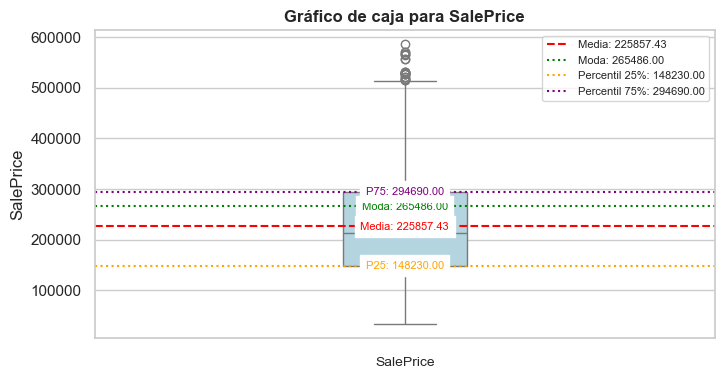

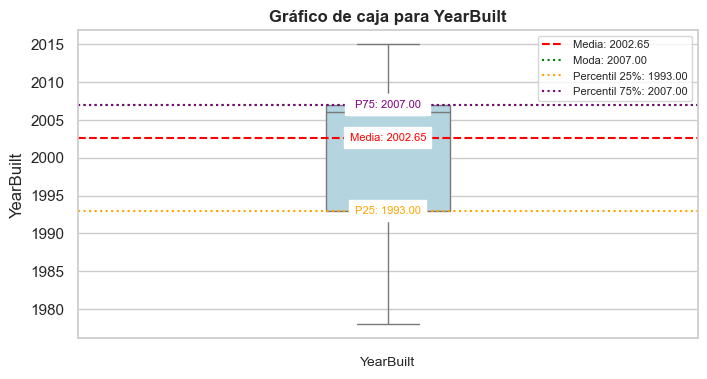

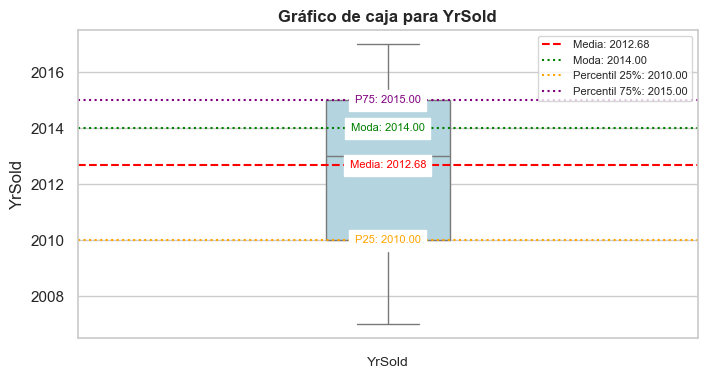

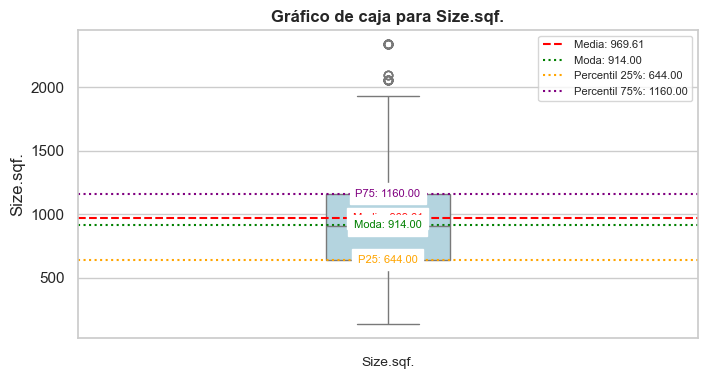

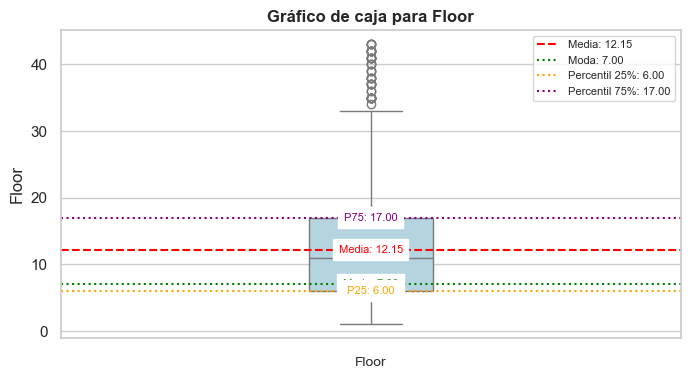

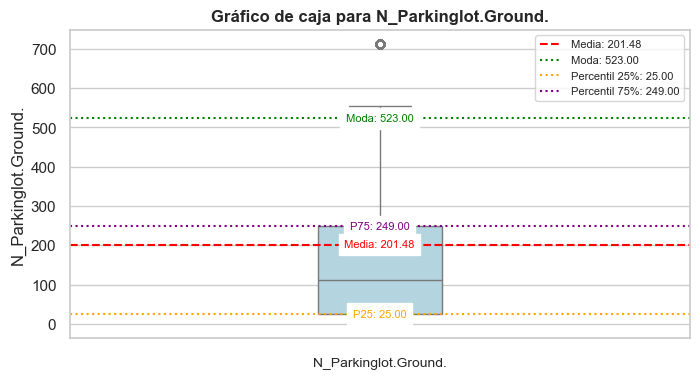

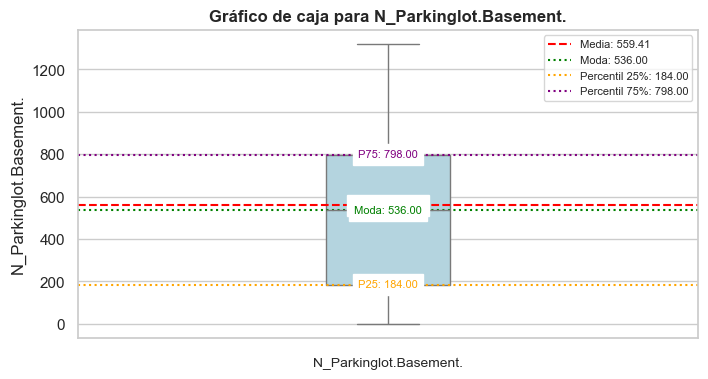

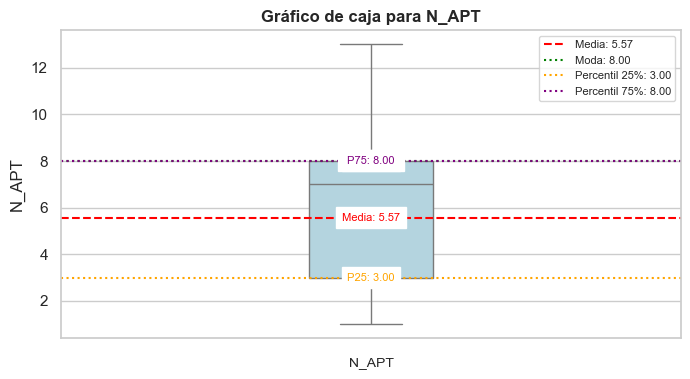

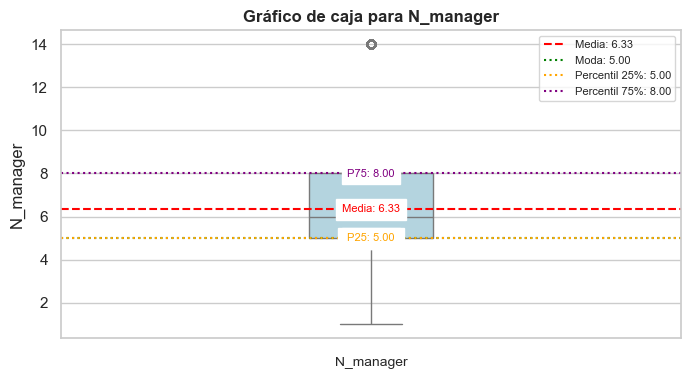

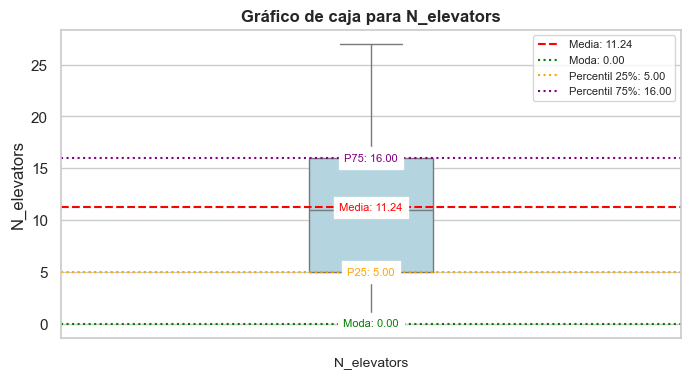

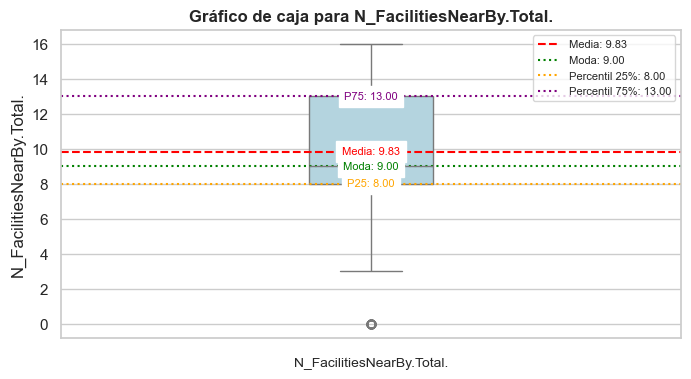

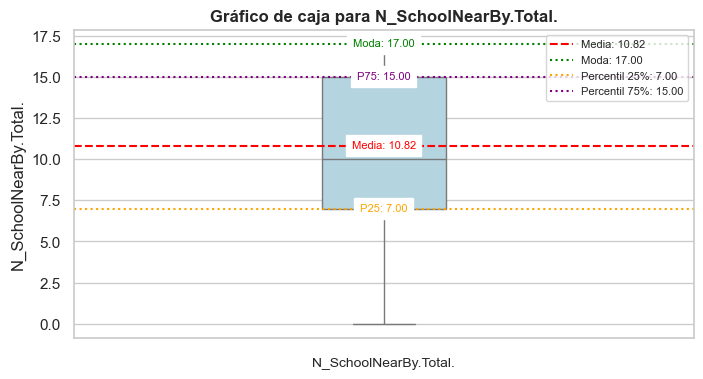

In [18]:
# Selección de columnas de tipo int64
int_columns = df_filtrado.select_dtypes(include="int64")

for column in int_columns.columns:
    plt.figure(figsize=(8, 4))  # Tamaño de la figura
    
    # Crear el boxplot con colores más neutros
    sns.boxplot(data=int_columns[column], color='lightblue', width=0.2)
    
    # Cálculos estadísticos
    media = int_columns[column].mean()
    moda = int_columns[column].mode()[0]
    p25 = int_columns[column].quantile(0.25)
    p75 = int_columns[column].quantile(0.75)

    # Agregar líneas horizontales con descripciones en la leyenda
    plt.axhline(media, color="red", linestyle="--", label=f'Media: {media:.2f}')
    plt.axhline(moda, color="green", linestyle=":", label=f'Moda: {moda:.2f}')
    plt.axhline(p25, color="orange", linestyle=":", label=f'Percentil 25%: {p25:.2f}')
    plt.axhline(p75, color="purple", linestyle=":", label=f'Percentil 75%: {p75:.2f}')
    
    # Mejorar la posición y tamaño del texto para que no se superponga
    plt.text(0, media, f'Media: {media:.2f}', color="red", ha="center", va="center", 
             fontsize=8, backgroundcolor='white')
    plt.text(0, moda, f'Moda: {moda:.2f}', color="green", ha="center", va="center", 
             fontsize=8, backgroundcolor='white')
    plt.text(0, p25, f'P25: {p25:.2f}', color="orange", ha="center", va="center", 
             fontsize=8, backgroundcolor='white')
    plt.text(0, p75, f'P75: {p75:.2f}', color="purple", ha="center", va="center", 
             fontsize=8, backgroundcolor='white')
    
    # Añadir título y etiquetas más visibles
    plt.title(f'Gráfico de caja para {column}', fontsize=12, fontweight='bold')
    plt.xlabel(column, fontsize=10)
    
    # Mostrar la leyenda
    plt.legend(loc="upper right", frameon=True, fontsize=8)
    
    plt.show()


#### Mátriz de Correlación

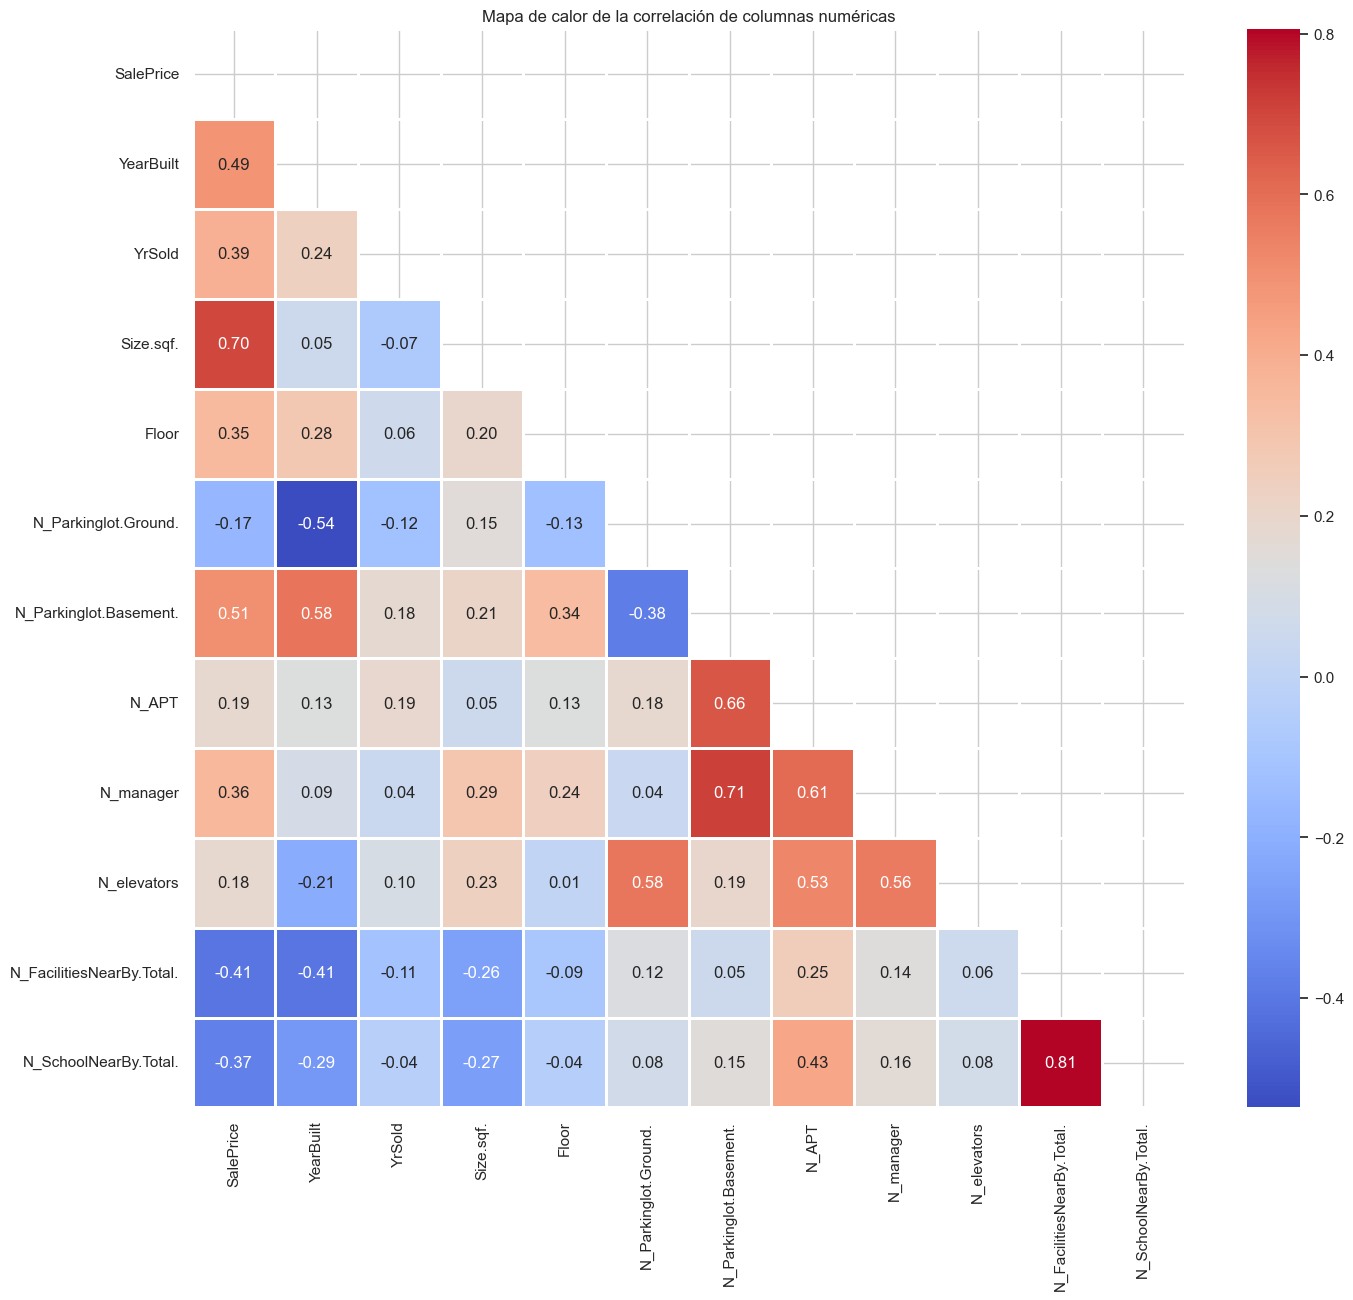

In [20]:

# Filtramos solo las columnas numéricas
df_numericas = df_filtrado.select_dtypes(include=[np.number])

# Calculamos la matriz de correlación con las columnas numéricas
correlation_matrix = df_numericas.corr()

# Creamos el gráfico de correlación
fig, ax = plt.subplots(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)) 
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', mask=mask, cmap='coolwarm', linewidths=1, ax=ax)

plt.title("Mapa de calor de la correlación de columnas numéricas")
plt.show()



**Observación** :
Las características físicas y de ubicación, como el tamaño en pies cuadrados, la presencia de estacionamiento subterráneo y la proximidad a servicios educativos, son factores importantes que influyen en el precio de las propiedades. Por otro lado, ciertos factores como el estacionamiento a nivel de suelo y la cercanía a otras instalaciones parecen tener una relación negativa con el precio de las propiedades en este conjunto de datos.
Estas correlaciones negativas no necesariamente indican que las características son "malas", sino que sugieren que estas variables pueden estar asociadas con zonas o tipos de propiedades que tienen un perfil de menor.

#### Gráfico de dispersión entre variables 

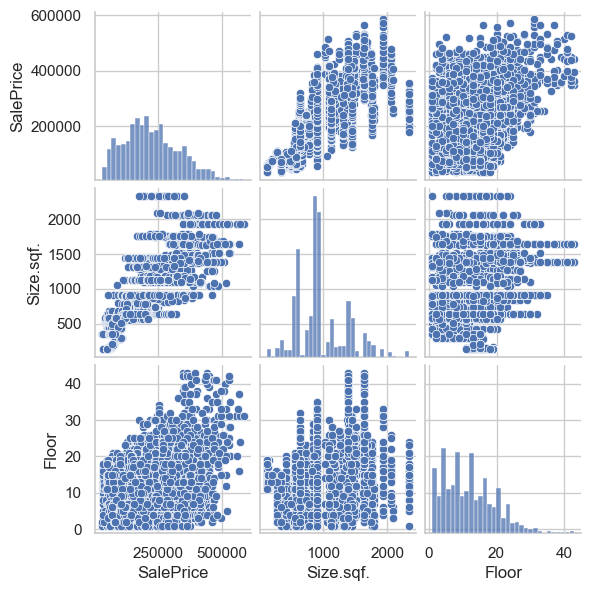

In [23]:
num_df = df_filtrado.filter(items=["SalePrice","Size.sqf.", "Floor"])
sns.pairplot(num_df, height=2)
plt.show()


**Observación** :
Los siguientes gráficos de dispersión ilustran las dos variables que presentan más correlación con la variable de interés; en este caso son el tamaño del inmueble y el piso en el que se encuentra ubicado. En los dos casos identificamos una correlación directa con el precio de venta. 

# Segunda Entrega: Modelo de Regresión Lineal Test Real State

Implemente un modelo de regresión lineal que represente el comportamiento de la variable "Precio de Venta" a partir de los datos suministrados

- Selección de las variables del modelo (20 puntos)
- Determinación de la estructura del modelo (20 puntos)
- Estimación de los parámetros del modelo (5 puntos)
- Verificación de los supuestos del modelo (25 puntos)
- Determinación de la bondad de ajuste del modelo (5 puntos)
- Cálculo de intervalos de confianza para los parámetros del modelo (5 puntos)
- Prueba de hipótesis sobre los parámetros del modelo (10 puntos) 
- Interpretación de los coeficientes del modelo (10 puntos) 

Teniendo presenta las variables definidas en la entrega anterior, que no existen datos nulos en la información compartida y que los datos atípicos encontrados en algunas variables al correlacionarlas con otras variables se observa que hacen parte del conjunto de datos y de la tendencia de comportamiento de este conjunto de datos; se procede a calcular 4 metodologías que permitan identificar las variables estratégicas a tener en cuenta:
1. Eliminación hacia atrás + Coeficiente de determinación ajustado
2. Eliminación hacia atrás + Mínimo AIC
3. Regresión paso a paso + Coeficiente de determinación ajustado
2. Regresión paso a paso + Mínimo AIC


### Selección de variables

#### Factor de inflación de varianza

In [29]:
# Selección de las variables independientes
X = df[['YearBuilt', 'YrSold', 'Size.sqf.', 'Floor',
        'N_Parkinglot.Ground.', 'N_Parkinglot.Basement.',
        'N_APT', 'N_manager',
        'N_elevators', 'N_FacilitiesNearBy.Total.', 'N_SchoolNearBy.Total.']]

# Agregar la constante (intercepto) a las variables independientes
X_const = add_constant(X)

# Calcular el VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Mostrar el resultado
print(vif_data)

                     Variable            VIF
0                       const  714728.011318
1                   YearBuilt       3.829731
2                      YrSold       1.194469
3                   Size.sqf.       1.526972
4                       Floor       1.189843
5        N_Parkinglot.Ground.       3.423877
6      N_Parkinglot.Basement.      10.931372
7                       N_APT       4.610308
8                   N_manager       4.350853
9                 N_elevators       2.982177
10  N_FacilitiesNearBy.Total.       3.597460
11      N_SchoolNearBy.Total.       3.790766


Teniendo presente que al calcular el factor de inflación de varianza, la variable "N_Parkinglot.Basement" toma un valor mayor a 10; eliminamos esta varible del conjunto de variables independientes del modelo.

#### Eliminación hacia atrás + Coeficiente de determinación ajustado



In [32]:
# Definir la variable dependiente y las independientes
y = df['SalePrice']
X = df[['YearBuilt', 'YrSold', 'Size.sqf.', 'Floor',
         'N_Parkinglot.Ground.',
         'N_APT', 'N_manager',
         'N_elevators', 'N_FacilitiesNearBy.Total.', 'N_SchoolNearBy.Total.']]

# Añadir una constante al modelo
X = sm.add_constant(X)

# Inicializar la lista de variables
variables = X.columns.tolist()

# Inicializar R² ajustado
adj_r2_history = []

# Función para calcular R² ajustado
def calculate_adj_r2(model):
    return model.rsquared_adj

# Eliminación hacia atrás
while len(variables) > 1:  # Dejar al menos la constante
    model = sm.OLS(y, X[variables]).fit()
    adj_r2 = calculate_adj_r2(model)
    
    # Guardar el R² ajustado y el número de variables
    adj_r2_history.append((len(variables) - 1, adj_r2, ', '.join(variables[1:])))  # -1 para no contar la constante
    
    p_values = model.pvalues[1:]  # Ignorar la constante
    
# Imprimir p-valores de todas las variables
    print(f"P-valores de las variables actuales (Total: {len(p_values)}):")
    print(p_values)
    print()  
    
    variable_to_remove = p_values.idxmax()  # Siempre eliminar la variable con el mayor p-valor
    variables.remove(variable_to_remove)
    print(f'Eliminando: {variable_to_remove} con p-valor {p_values.max()}')

# Crear un DataFrame para el informe
report_df = pd.DataFrame(adj_r2_history, columns=['Número de Variables', 'R² Ajustado', 'Variables Restantes'])

# Imprimir el informe
report_df.head(11)


P-valores de las variables actuales (Total: 10):
YearBuilt                    1.215341e-111
YrSold                        0.000000e+00
Size.sqf.                     0.000000e+00
Floor                         1.135047e-37
N_Parkinglot.Ground.          1.311814e-15
N_APT                         1.752618e-02
N_manager                     4.170077e-22
N_elevators                   2.411719e-03
N_FacilitiesNearBy.Total.     6.873632e-01
N_SchoolNearBy.Total.         1.931788e-29
dtype: float64

Eliminando: N_FacilitiesNearBy.Total. con p-valor 0.6873632370367766
P-valores de las variables actuales (Total: 9):
YearBuilt                1.909073e-115
YrSold                    0.000000e+00
Size.sqf.                 0.000000e+00
Floor                     1.200977e-37
N_Parkinglot.Ground.      1.407982e-15
N_APT                     1.901868e-02
N_manager                 3.606927e-23
N_elevators               2.592674e-03
N_SchoolNearBy.Total.     2.111042e-54
dtype: float64

Eliminando: N_APT con

,Número de Variables,R² Ajustado,Variables Restantes
0,10,0.821999,"YearBuilt, YrSold, Size.sqf., Floor, N_Parking..."
1,9,0.822035,"YearBuilt, YrSold, Size.sqf., Floor, N_Parking..."
2,8,0.821840,"YearBuilt, YrSold, Size.sqf., Floor, N_Parking..."
3,7,0.821317,"YearBuilt, YrSold, Size.sqf., Floor, N_Parking..."
4,6,0.819282,"YearBuilt, YrSold, Size.sqf., Floor, N_manager..."
5,5,0.812385,"YearBuilt, YrSold, Size.sqf., N_manager, N_Sch..."
6,4,0.800429,"YearBuilt, YrSold, Size.sqf., N_manager"
7,3,0.789181,"YearBuilt, YrSold, Size.sqf."
8,2,0.682051,"YrSold, Size.sqf."
9,1,0.499030,Size.sqf.


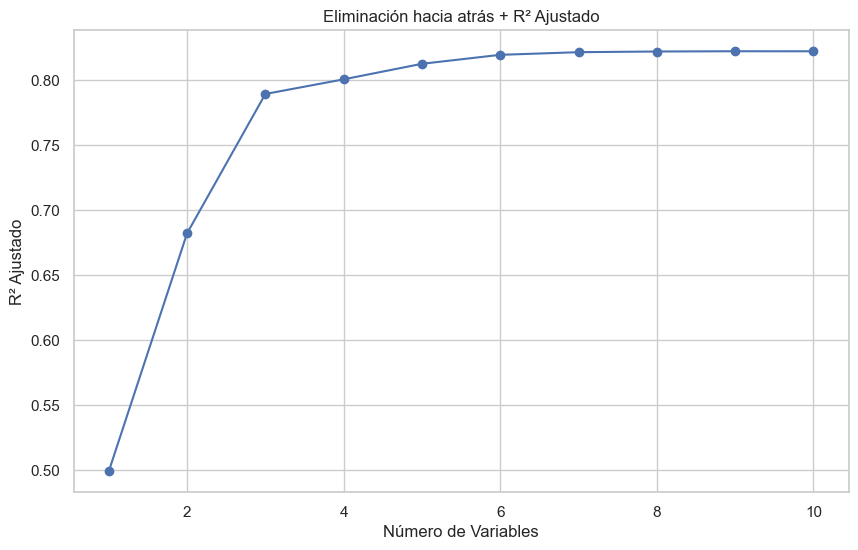

In [33]:
# Graficar el R² Ajustado frente al Número de Variables
plt.figure(figsize=(10, 6))
plt.plot(report_df['Número de Variables'], report_df['R² Ajustado'], marker='o', linestyle='-', color='b')

# Etiquetas para los ejes
plt.xlabel('Número de Variables')
plt.ylabel('R² Ajustado')

# Título de la gráfica
plt.title('Eliminación hacia atrás + R² Ajustado')

# Mostrar la gráfica
plt.grid(True)
plt.show()

Teniendo presente la combinación de los métodos "Eliminación hacia atrás" y "Coeficiente de determinación ajustado" se observa que la combinación que ofrece un modelo más ajustado garantizando en la menor complejidad analítica, parace ser un modelo de 6 variables que nos brindaría un R2 de 82% y consideraría las siguientes variables: 

YearBuilt                 
YrSold                    
Size.sqf.                 
Floor                     
N_manager     
N_SchoolNearBy.Total. 


#### Eliminación hacia atrás + Mínimo AIC



In [36]:
# Definir la variable dependiente y las independientes
y = df['SalePrice']
X = df[['YearBuilt', 'YrSold', 'Size.sqf.', 'Floor',
         'N_Parkinglot.Ground.',
         'N_APT', 'N_manager',
         'N_elevators', 'N_FacilitiesNearBy.Total.', 'N_SchoolNearBy.Total.']]

# Añadir una constante al modelo
X = sm.add_constant(X)

# Inicializar la lista de variables
variables = X.columns.tolist()

# Inicializar historia de AIC
aic_history = []

# Eliminación hacia atrás
while len(variables) > 1:  # Dejar al menos la constante
    model = sm.OLS(y, X[variables]).fit()
    aic = model.aic  # Obtener el AIC del modelo
    adj_r2 = model.rsquared_adj #Obtener R2 ajustado
    
    # Guardar el AIC y el número de variables
    aic_history.append((len(variables) - 1, aic, adj_r2, ', '.join(variables[1:])))  # -1 para no contar la constante
    
    p_values = model.pvalues[1:]  # Ignorar la constante
    
    # Imprimir p-valores de todas las variables
    print(f"P-valores de las variables actuales (Total: {len(p_values)}):")
    print(p_values)
    print()  
    
    variable_to_remove = p_values.idxmax()  # Siempre eliminar la variable con el mayor p-valor
    variables.remove(variable_to_remove)
    print(f'Eliminando: {variable_to_remove} con p-valor {p_values.max()}')

# Crear un DataFrame para el informe
report_df = pd.DataFrame(aic_history, columns=['Número de Variables', 'AIC', 'R² Ajustado', 'Variables Restantes'])

# Imprimir el informe
report_df.head(11)

P-valores de las variables actuales (Total: 10):
YearBuilt                    1.215341e-111
YrSold                        0.000000e+00
Size.sqf.                     0.000000e+00
Floor                         1.135047e-37
N_Parkinglot.Ground.          1.311814e-15
N_APT                         1.752618e-02
N_manager                     4.170077e-22
N_elevators                   2.411719e-03
N_FacilitiesNearBy.Total.     6.873632e-01
N_SchoolNearBy.Total.         1.931788e-29
dtype: float64

Eliminando: N_FacilitiesNearBy.Total. con p-valor 0.6873632370367766
P-valores de las variables actuales (Total: 9):
YearBuilt                1.909073e-115
YrSold                    0.000000e+00
Size.sqf.                 0.000000e+00
Floor                     1.200977e-37
N_Parkinglot.Ground.      1.407982e-15
N_APT                     1.901868e-02
N_manager                 3.606927e-23
N_elevators               2.592674e-03
N_SchoolNearBy.Total.     2.111042e-54
dtype: float64

Eliminando: N_APT con

,Número de Variables,AIC,R² Ajustado,Variables Restantes
0,10,100063.155171,0.821999,"YearBuilt, YrSold, Size.sqf., Floor, N_Parking..."
1,9,100061.317579,0.822035,"YearBuilt, YrSold, Size.sqf., Floor, N_Parking..."
2,8,100064.831414,0.821840,"YearBuilt, YrSold, Size.sqf., Floor, N_Parking..."
3,7,100075.922829,0.821317,"YearBuilt, YrSold, Size.sqf., Floor, N_Parking..."
4,6,100121.628655,0.819282,"YearBuilt, YrSold, Size.sqf., Floor, N_manager..."
5,5,100275.091427,0.812385,"YearBuilt, YrSold, Size.sqf., N_manager, N_Sch..."
6,4,100528.871633,0.800429,"YearBuilt, YrSold, Size.sqf., N_manager"
7,3,100754.000781,0.789181,"YearBuilt, YrSold, Size.sqf."
8,2,102447.510545,0.682051,"YrSold, Size.sqf."
9,1,104321.503214,0.499030,Size.sqf.


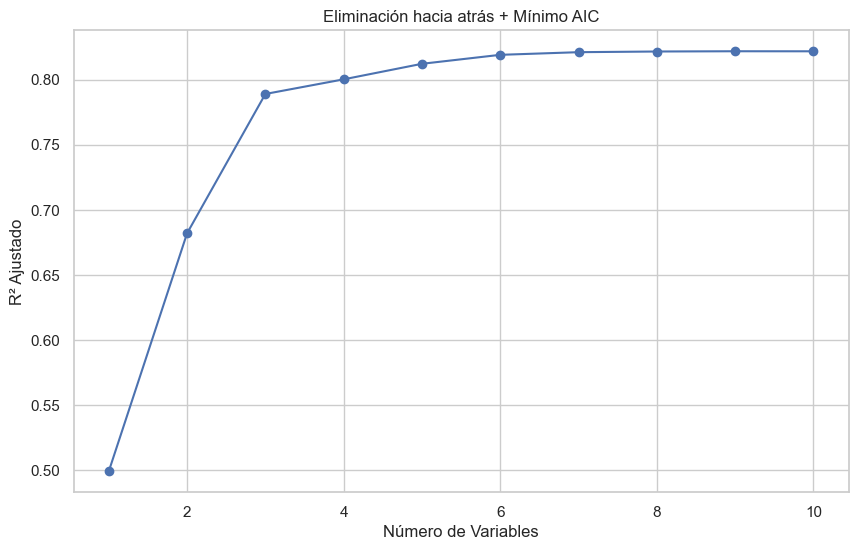

In [37]:
# Graficar el R² Ajustado frente al Número de Variables
plt.figure(figsize=(10, 6))
plt.plot(report_df['Número de Variables'], report_df['R² Ajustado'], marker='o', linestyle='-', color='b')

# Etiquetas para los ejes
plt.xlabel('Número de Variables')
plt.ylabel('R² Ajustado')

# Título de la gráfica
plt.title('Eliminación hacia atrás + Mínimo AIC')

# Mostrar la gráfica
plt.grid(True)
plt.show()

Teniendo presente la combinación de los métodos "Eliminación hacia atrás" y "Criterio AIC" se observa que la combinación que ofrece un modelo más ajustado garantizando en la menor complejidad analítica, parace ser un modelo de 6 variables que nos brindaría un AIC de 100.121 y un R2 de 81.9% y consideraría las siguientes variables: 

YearBuilt                 
YrSold                    
Size.sqf.                 
Floor                                        
N_manager                              
N_SchoolNearBy.Total.   


#### Regresión paso a paso + Coeficiente de determinación ajustado



In [40]:
y = df['SalePrice']
X = df[['YearBuilt', 'YrSold', 'Size.sqf.', 'Floor',
         'N_Parkinglot.Ground.',
         'N_APT', 'N_manager',
         'N_elevators', 'N_FacilitiesNearBy.Total.', 'N_SchoolNearBy.Total.']]

# Añadir una constante al modelo
X = sm.add_constant(X)

# Inicializar la lista de variables y el modelo
variables = []  # Comienza con el modelo vacío (solo constante)
remaining_variables = X.columns.tolist()[1:]  # Todas las variables excepto la constante
r2_history = []  # Para guardar el historial del R² ajustado

# Regresión paso a paso
while len(remaining_variables) > 0:
    r2_values = []
    
    # Para cada variable candidata en remaining_variables, evaluamos el modelo
    for variable in remaining_variables:
        model = sm.OLS(y, X[variables + [variable]]).fit()
        r2_values.append((model.rsquared_adj, variable))  # Guardamos el R² ajustado y la variable
    
    # Encontramos la variable que más reduce el R² ajustado
    best_r2_adj, best_variable = max(r2_values, key=lambda x: x[0])  # Seleccionamos la que tiene el R² ajustado más bajo
    
    # Ajustar el modelo con la mejor variable
    variables.append(best_variable)
    remaining_variables.remove(best_variable)
    
    # Guardar el R² ajustado y el número de variables
    r2_history.append((len(variables), best_r2_adj, ', '.join(variables)))

    print(f'Agregando: {best_variable} con R² ajustado {best_r2_adj}')

# Crear un DataFrame para el informe
report_df = pd.DataFrame(r2_history, columns=['Número de Variables', 'R² Ajustado', 'Variables Restantes'])

# Imprimir el informe
report_df.head(11)

Agregando: Size.sqf. con R² ajustado 0.9041349296768206
Agregando: N_Parkinglot.Ground. con R² ajustado 0.9148572789793794
Agregando: N_elevators con R² ajustado 0.9255632981847408
Agregando: Floor con R² ajustado 0.93171055494858
Agregando: N_SchoolNearBy.Total. con R² ajustado 0.9339189747728114
Agregando: N_APT con R² ajustado 0.9394239344404263
Agregando: YearBuilt con R² ajustado 0.9433219816612382
Agregando: N_FacilitiesNearBy.Total. con R² ajustado 0.9438769946874266
Agregando: YrSold con R² ajustado 0.9440921555225668
Agregando: N_manager con R² ajustado 0.9440787121298574


,Número de Variables,R² Ajustado,Variables Restantes
0,1,0.904135,Size.sqf.
1,2,0.914857,"Size.sqf., N_Parkinglot.Ground."
2,3,0.925563,"Size.sqf., N_Parkinglot.Ground., N_elevators"
3,4,0.931711,"Size.sqf., N_Parkinglot.Ground., N_elevators, ..."
4,5,0.933919,"Size.sqf., N_Parkinglot.Ground., N_elevators, ..."
5,6,0.939424,"Size.sqf., N_Parkinglot.Ground., N_elevators, ..."
6,7,0.943322,"Size.sqf., N_Parkinglot.Ground., N_elevators, ..."
7,8,0.943877,"Size.sqf., N_Parkinglot.Ground., N_elevators, ..."
8,9,0.944092,"Size.sqf., N_Parkinglot.Ground., N_elevators, ..."
9,10,0.944079,"Size.sqf., N_Parkinglot.Ground., N_elevators, ..."


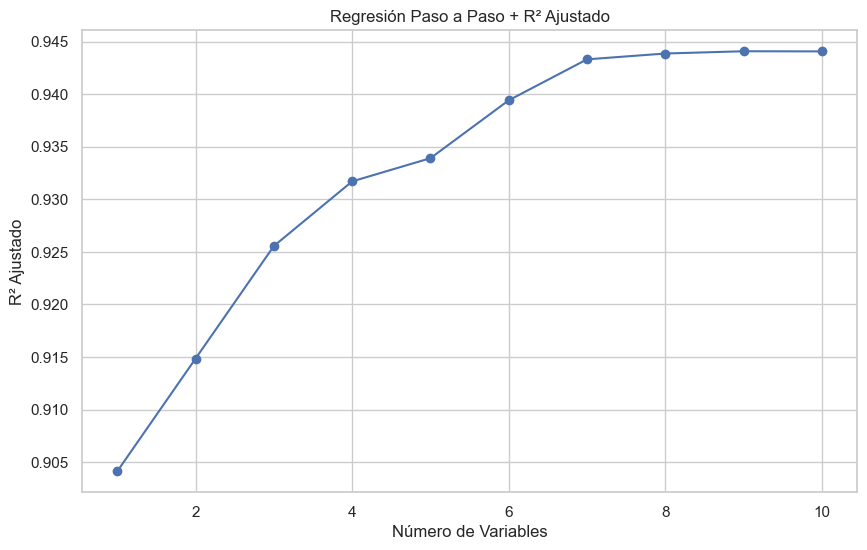

In [41]:
# Graficar el R² Ajustado frente al Número de Variables
plt.figure(figsize=(10, 6))
plt.plot(report_df['Número de Variables'], report_df['R² Ajustado'], marker='o', linestyle='-', color='b')

# Etiquetas para los ejes
plt.xlabel('Número de Variables')
plt.ylabel('R² Ajustado')

# Título de la gráfica
plt.title('Regresión Paso a Paso + R² Ajustado')

# Mostrar la gráfica
plt.grid(True)
plt.show()

Teniendo presente los resultados al aplicar la metodología de regresión paso a paso + coeficiente de determinación ajustado, se observa que el modelo que mejor representa la variable dependeniente y que maneja la menor complejidad analítica es el compuesto por 8 variables, que nos brinda un R2 de 94.3%; y que incluye entre sus variables:

Size.sqf  
N_Parkinglot.Ground     
N_elevators      
Floor       
N_SchoolNearBy.Total  
N_APT     
YrSold  




#### Regresión paso a paso + Mínimo AIC

In [44]:
# Definir la variable dependiente y las independientes
y = df['SalePrice']
X = df[['YearBuilt', 'YrSold', 'Size.sqf.', 'Floor',
         'N_Parkinglot.Ground.',
         'N_APT', 'N_manager',
         'N_elevators', 'N_FacilitiesNearBy.Total.', 'N_SchoolNearBy.Total.']]

# Añadir una constante al modelo
X = sm.add_constant(X)

# Inicializar la lista de variables y el modelo
variables = []
remaining_variables = X.columns.tolist()[1:]  # Todas las variables excepto la constante
aic_history = []

# Regresión paso a paso
while len(remaining_variables) > 0:
    aic_values = []
    
    for variable in remaining_variables:
        model = sm.OLS(y, X[variables + [variable]]).fit()
        aic_values.append((model.aic, variable, model.rsquared_adj))  # Guardar AIC y R² ajustado
    
    # Encontrar la variable con el AIC más bajo
    best_aic, best_variable, best_adj_r2 = min(aic_values, key=lambda x: x[0])
    
    # Ajustar el modelo con la mejor variable
    variables.append(best_variable)
    remaining_variables.remove(best_variable)
    
    # Guardar el AIC, R² ajustado y el número de variables
    aic_history.append((len(variables), best_aic, best_adj_r2, ', '.join(variables)))

    print(f'Agregando: {best_variable} con AIC {best_aic} y R² ajustado {best_adj_r2}')

# Crear un DataFrame para el informe
report_df = pd.DataFrame(aic_history, columns=['Número de Variables', 'AIC', 'R² Ajustado', 'Variables Restantes'])

# Imprimir el informe
report_df.head(11)

Agregando: Size.sqf. con AIC 104413.2830273348 y R² ajustado 0.9041349296768206
Agregando: N_Parkinglot.Ground. con AIC 103925.12361617094 y R² ajustado 0.9148572789793794
Agregando: N_elevators con AIC 103371.94073466239 y R² ajustado 0.9255632981847408
Agregando: Floor con AIC 103017.4762103645 y R² ajustado 0.93171055494858
Agregando: N_SchoolNearBy.Total. con AIC 102882.90450477187 y R² ajustado 0.9339189747728114
Agregando: N_APT con AIC 102525.19028083184 y R² ajustado 0.9394239344404263
Agregando: YearBuilt con AIC 102251.88741853226 y R² ajustado 0.9433219816612382
Agregando: N_FacilitiesNearBy.Total. con AIC 102212.3027700038 y R² ajustado 0.9438769946874266
Agregando: YrSold con AIC 102197.45998974828 y R² ajustado 0.9440921555225668
Agregando: N_manager con AIC 102199.44920336017 y R² ajustado 0.9440787121298574


,Número de Variables,AIC,R² Ajustado,Variables Restantes
0,1,104413.283027,0.904135,Size.sqf.
1,2,103925.123616,0.914857,"Size.sqf., N_Parkinglot.Ground."
2,3,103371.940735,0.925563,"Size.sqf., N_Parkinglot.Ground., N_elevators"
3,4,103017.476210,0.931711,"Size.sqf., N_Parkinglot.Ground., N_elevators, ..."
4,5,102882.904505,0.933919,"Size.sqf., N_Parkinglot.Ground., N_elevators, ..."
5,6,102525.190281,0.939424,"Size.sqf., N_Parkinglot.Ground., N_elevators, ..."
6,7,102251.887419,0.943322,"Size.sqf., N_Parkinglot.Ground., N_elevators, ..."
7,8,102212.302770,0.943877,"Size.sqf., N_Parkinglot.Ground., N_elevators, ..."
8,9,102197.459990,0.944092,"Size.sqf., N_Parkinglot.Ground., N_elevators, ..."
9,10,102199.449203,0.944079,"Size.sqf., N_Parkinglot.Ground., N_elevators, ..."


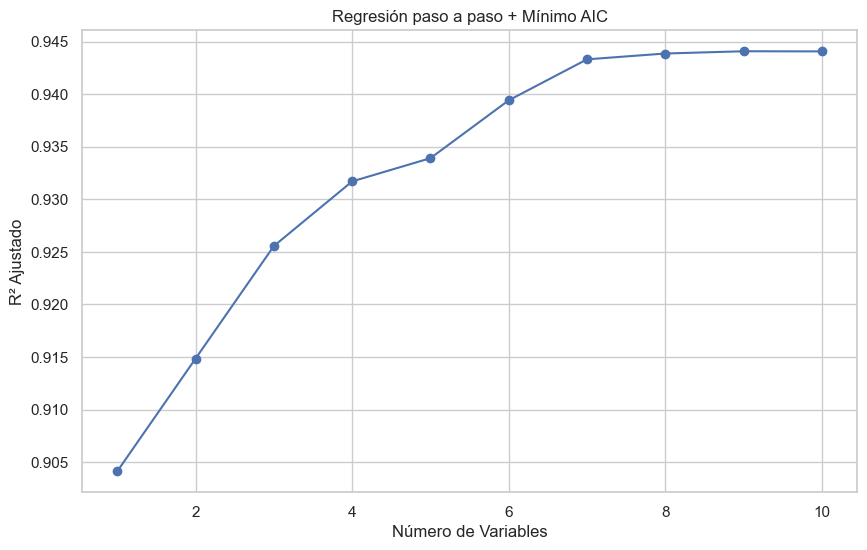

In [45]:
# Graficar el R² Ajustado frente al Número de Variables
plt.figure(figsize=(10, 6))
plt.plot(report_df['Número de Variables'], report_df['R² Ajustado'], marker='o', linestyle='-', color='b')

# Etiquetas para los ejes
plt.xlabel('Número de Variables')
plt.ylabel('R² Ajustado')

# Título de la gráfica
plt.title('Regresión paso a paso + Mínimo AIC')

# Mostrar la gráfica
plt.grid(True)
plt.show()

La combinación de las metodologías "Regresión paso a paso" y "Mínimo AIC", nos permite observa que el modelo que representa un menor AIC conservando una baja complejidad analítica, es el compuesto por 7 variables, el cuál representa un AIC de 102.251 y un R2 ajustado de 94.3%, este modelo incluiría las siguientes variables:

Size.sqf  
N_Parkinglot.Ground     
N_elevators      
Floor       
N_SchoolNearBy.Total  
N_APT     
YrSold 


### Formulación del Modelo

In [48]:
y = df['SalePrice']
X = df[['YearBuilt', 'YrSold', 'Size.sqf.', 'Floor', 'N_manager',
         'N_SchoolNearBy.Total.']]
X = sm.add_constant(X)

model = sm.OLS(y, X)  # OLS significa "Ordinary Least Squares"
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     3116.
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:47:57   Log-Likelihood:                -50054.
No. Observations:                4124   AIC:                         1.001e+05
Df Residuals:                    4117   BIC:                         1.002e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.122e+

In [82]:
y = df['SalePrice']
X = df[['YrSold', 'Size.sqf.', 'Floor',
         'N_Parkinglot.Ground.', 'N_APT', 
         'N_elevators', 
         'N_SchoolNearBy.Total.']]
X = sm.add_constant(X)

model = sm.OLS(y, X)  # OLS significa "Ordinary Least Squares"
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     2296.
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:50:50   Log-Likelihood:                -50305.
No. Observations:                4124   AIC:                         1.006e+05
Df Residuals:                    4116   BIC:                         1.007e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.467e+

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y = df['SalePrice']
X = df[['YearBuilt', 'YrSold', 'Size.sqf.', 'Floor',
         'N_Parkinglot.Ground.', 'N_APT', 'N_manager',
         'N_elevators', 'N_FacilitiesNearBy.Total.',
         'N_SchoolNearBy.Total.']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
print(f"RMSE: {rmse}")

RMSE: 44893.03263805617


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Verificación de los supuestos del modelo

#### Media Cero

#### Varianza constante

#### Normalidad

#### Independencia

### Cálculo de los intervalos de confianza del modelo

### Prueba de hipótesis sobre los parámetros del modelo

### Interpretación de los coeficientes del modelo